#**EQUIPO 15**

INTEGRANTES:
* HURTADO GUTIÉRREZ MARCO ANTONIO
* SALDAÑA CABRERA MIGUEL ANGEL
* VEGA MARTÍNEZ ANGEL

# CRIPTO-MEX
## Herramienta para ayudar a convertir tu inversión en su equivalente en alguna criptomoneda

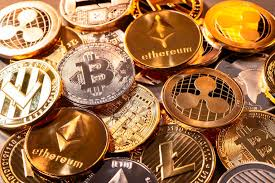


## Identificación del problema:

Las falta de herramientas de conversión accesibles para conocer el valor que puedes invertir en una criptomoneda no ayuda a que las personas se decidan a invertir en alguna, ni siquiera se atreven a profundizar ni aprender de esta rama. 

## Planteamiento de preguntas clave:



   

*   ¿Qué información debo recopilar y de donde la obtengo?
*   ¿Qué bases de datos requiero para resolver este problema?
*   ¿Qué API's me pueden ayudar a obtener esta información        actualizada en tiempo real?
* ¿Qué Bibliotecas y/o paquetes vamos a usar?
*   ¿Es necesario limpiar o transformar algún dato?









## Colección de datos y uso de API's:

* Las Bibliotecas que se emplearon fueron las siguientes: CmcScraper, requests, json y el paquete de Pandas.

*   La API de la cual se recopilaron las bases de datos pertinentes acerca de las criptomonedas la vamos a encontrar en el siguiente enlace: https://coinmarketcap.com/api/documentation/v1/#tag/cryptocurrency.
*  La API de donde se obtuvo la conversión de divisas es la siguiente: https://exchangeratesapi.io/.



In [19]:
!pip install cryptocmd # Para instalar cryptocmd.

# Importamos las bibliotecas y el paquete.
from cryptocmd import CmcScraper
import requests
import pandas as pd
import json


## Análisis exploratorio de datos:

In [2]:
# Análisis exploratorio de las criptomonedas.

cripto_moneda = input('¿Qué criptomoneda quieres buscar?  ',)
scraper = CmcScraper(cripto_moneda) #Buscando bitcoin
headers, data = scraper.get_data() #obteniendo todo el raw data
btc_json_data = scraper.get_data("json") #transformando a json
scraper.export("csv", name="BTC_all_time") #exportandolo a csv y cambiando el nombre
dfx = scraper.get_dataframe() #haciendolo un dataFrame

¿Qué criptomoneda quieres buscar?  btc


In [3]:
dfx.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-03-08,51174.116947,52314.068801,49506.053458,52246.522310,4.859743e+10,9.743219e+11
1,2021-03-07,48918.680265,51384.366010,48918.680265,51206.692953,4.313746e+10,9.548810e+11
2,2021-03-06,48899.230782,49147.218220,47257.526908,48912.381731,3.436356e+10,9.120542e+11
3,2021-03-05,48527.031981,49396.430862,46542.514940,48927.304555,4.862593e+10,9.122851e+11
4,2021-03-04,50522.305030,51735.091053,47656.929046,48561.166154,5.234382e+10,9.054141e+11


In [4]:
# Análisis exploratorio de las divisas.

x = input('¿En qué divisa te encuentras?  ',) 

# Obtenemos la API y además le concatenamos la base que queremos utilzar
endpoint = 'https://api.exchangeratesapi.io/latest?base='+x.upper() 

¿En qué divisa te encuentras?  mxn


In [5]:
r = requests.get(endpoint) # Hacemos esta petición con endpoint.


In [6]:
r.status_code # Verificamos que no existe ningun error.

200

In [7]:
json = r.json() # Convertimo a formato json.

In [8]:
json.keys() # Obtenemos las llaves.

dict_keys(['rates', 'base', 'date'])

In [9]:
json['rates'] # Divisas en su valor base.

{'AUD': 0.060600018,
 'BGN': 0.0764704272,
 'BRL': 0.2667667609,
 'CAD': 0.0587858101,
 'CHF': 0.0433494031,
 'CNY': 0.3028085033,
 'CZK': 1.0328864282,
 'DKK': 0.2907502766,
 'EUR': 0.0390993083,
 'GBP': 0.033519055,
 'HKD': 0.360429154,
 'HRK': 0.2962945585,
 'HUF': 14.3568750269,
 'IDR': 666.2357922888,
 'ILS': 0.1548801802,
 'INR': 3.4034970421,
 'ISK': 5.9704643825,
 'JPY': 5.0399008442,
 'KRW': 52.8497530879,
 'MXN': 1.0,
 'MYR': 0.1905700288,
 'NOK': 0.3979723099,
 'NZD': 0.0651902768,
 'PHP': 2.2600573196,
 'PLN': 0.1798646382,
 'RON': 0.1910079411,
 'RUB': 3.4697039009,
 'SEK': 0.3980426886,
 'SGD': 0.0625432536,
 'THB': 1.42849323,
 'TRY': 0.3560461215,
 'USD': 0.0463952393,
 'ZAR': 0.7177929222}

In [10]:
json['base'] # Verificamos que sea la base que se introdujo anteriormente.

'MXN'

In [11]:
json['date'] # Comprobamos la fecha actual.

'2021-03-08'

## Limpieza de Datos:

In [12]:
# Limpieza de datos del dataframe de las divisas.

data = json['rates'] # Guardamos en una variable llamada data el valor de rates para su limpieza.
# Con la limpieza de datos podemos visualizar el siguiente dataframe.
normalized = pd.json_normalize(data) 
df = pd.DataFrame.from_dict(normalized)
df.head()

,CAD,HKD,ISK,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,BRL,RUB,HRK,JPY,THB,CHF,EUR,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,USD,MXN,SGD,AUD,ILS,KRW,PLN
0,0.058786,0.360429,5.970464,2.260057,0.29075,14.356875,1.032886,0.033519,0.191008,0.398043,666.235792,3.403497,0.266767,3.469704,0.296295,5.039901,1.428493,0.043349,0.039099,0.19057,0.07647,0.356046,0.302809,0.397972,0.06519,0.717793,0.046395,1.0,0.062543,0.0606,0.15488,52.849753,0.179865


In [13]:
# Fución para optener el nombre de las divisas.

def nombre_divisas():

    nombre = []

    for columna in df:

        nombre.append(columna)

    return nombre

In [14]:
# Limpieza del datframe de las criptomonedas.

df_nuevo= dfx.drop(['Open','High','Low','Volume','Market Cap'], axis = 1)
df_nuevo.head()

,Date,Close
0,2021-03-08,52246.522310
1,2021-03-07,51206.692953
2,2021-03-06,48912.381731
3,2021-03-05,48927.304555
4,2021-03-04,48561.166154


## Transformación de datos

In [15]:
# Función para conversión de divisas.

def conversor_de_divisas(cantidad_en_dolares, pais):
    
    moneda = df[pais].loc[0]
    return cantidad_en_dolares * moneda
     

inversion = input("¿Cuánto quieres invertir?", )
inversion = float(inversion)
cantidad_en_dolares = inversion



z = conversor_de_divisas(cantidad_en_dolares, 'USD')

print('Tú inversión equivale a: ', z,'USD')

¿Cuánto quieres invertir?10000
Tú inversión equivale a:  463.95239300000003 USD


In [16]:
# Valor de la moneda el día que se consultó.

hoy = df_nuevo.iloc[0,1]
hoy

52246.52230995

In [17]:
# Conversión Final.

eq = z/hoy
print(f'Tú inversión en {cripto_moneda} es : {eq}')

Tú inversión en btc es : 0.008880062681447478


## Cripto-Mex:

In [18]:
print(''' Bienvenido a Cripto-Mex Versión: Beta''')

cliente = input('\n ¿Cuál es tu nombre? ', )

print(f'''\n \n ¡Hola {cliente}!, nosotros te ayudaremos a conocer el valor equivalente de tu inversión
          a la criptomoneda que tú elijas''')

print('\n Este es nuestro catálogo de Criptomonedas:')
print(["\n BTC",'ETH','BNB','USDT','ADA','DOT','XRP'])
print('\n Para mas codigos de cryptomonedas consultar la web:  https://coinmarketcap.com')
moneda = input('\n ¿En cuál criptomoneda te gustaría invertir?  ',)

scraper= CmcScraper(moneda) #Buscando bitcoin
headers, data = scraper.get_data() #obteniendo todo el raw data
btc_json_data = scraper.get_data("json") #transformando a json
scraper.export("csv", name="BTC_all_time") #exportandolo a csv y cambiando el nombre
dfx = scraper.get_dataframe() #haciendolo un dataFrame

df_nuevo= dfx.drop(['Open','High','Low','Volume','Market Cap'], axis = 1)

hoy = df_nuevo.iloc[0,1]

print("\n Catálogo de las divisas")
print(['CAD', 'HKD', 'ISK', 'PHP', 'DKK', 'HUF', 'CZK', 'GBP','RON', 'SEK', 'IDR','INR', 'BRL', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'EUR', 'MYR','BGN', 'TRY','CNY',
 'NOK', 'NZD','ZAR','USD','MXN','SGD','AUD' ,'ILS','KRW','PLN'])

x = input('¿En qué divisa te encuentras?  ',)

endpoint = 'https://api.exchangeratesapi.io/latest?base='+x.upper()

r = requests.get(endpoint)
json = r.json()

data = json['rates']
normalized = pd.json_normalize(data)


df = pd.DataFrame.from_dict(normalized)

def nombre_divisas():

    nombre = []

    for columna in df:

        nombre.append(columna)

    return nombre

nombre_divisas() 

def conversor_de_divisas(cantidad_en_dolares, pais):
    
    moneda = df[pais].loc[0]
    return cantidad_en_dolares * moneda
     

inversion = input(f"\n ¿Cuánto quieres invertir {cliente}? ", )
inversion = float(inversion)
inversion_z = conversor_de_divisas(inversion, 'USD')
print('Tú inversión equivale a: ', inversion_z,'USD')

eq = inversion_z/hoy
print(f'Tú inversión en {moneda} es : {eq}')

 Bienvenido a Cripto-Mex Versión: Beta

 ¿Cuál es tu nombre? marco

 
 ¡Hola marco!, nosotros te ayudaremos a conocer el valor equivalente de tu inversión
          a la criptomoneda que tú elijas

 Este es nuestro catálogo de Criptomonedas:
['\n BTC', 'ETH', 'BNB', 'USDT', 'ADA', 'DOT', 'XRP']

 Para mas codigos de cryptomonedas consultar la web:  https://coinmarketcap.com

 ¿En cuál criptomoneda te gustaría invertir?  btc

 Catálogo de las divisas
['CAD', 'HKD', 'ISK', 'PHP', 'DKK', 'HUF', 'CZK', 'GBP', 'RON', 'SEK', 'IDR', 'INR', 'BRL', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'EUR', 'MYR', 'BGN', 'TRY', 'CNY', 'NOK', 'NZD', 'ZAR', 'USD', 'MXN', 'SGD', 'AUD', 'ILS', 'KRW', 'PLN']
¿En qué divisa te encuentras?  mxn

 ¿Cuánto quieres invertir marco? 1000
Tú inversión equivale a:  46.3952393 USD
Tú inversión en btc es : 0.0008880062681447476


## Problematicas y continuación de este proyecto:



*   Desertó un integrante del equipo para este Módulo.
*   Administración del tiempo.
*   Fue complicado la búsqueda de API's.



Para la continuación de este proyecto y con la ayuda de Machine Learning se pronosticará el rendimiento de tu inversión a cierto plazo.